## Aplicação dos métodos

### Importação

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('dados tratados/v1/data.csv')

In [3]:
df = df.drop(['Mau', 'Maa', 'Mag'], axis=1)

In [4]:
df['Abs 1º Pico'] = df['Abs 1º Pico'].replace(np.nan,0)

In [5]:
df['Abs 2º Pico'] = df['Abs 2º Pico'].replace(np.nan,0)

In [6]:
df['Resultado 2'] = list(df['Resultado'].replace('FI','NF'))

### Absorbância 1º Pico

In [43]:
TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 2319
FEATURES = list(df.columns)[1:8]
TARGET = ['Abs 1º Pico']
# TARGET = ['Resultado']

indices = df.index
indices_treino, indices_teste = train_test_split(indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

X_treino = df_treino.reindex(FEATURES, axis=1)
y_treino = df_treino.reindex(TARGET, axis=1)
X_teste = df_teste.reindex(FEATURES, axis=1)
y_teste = df_teste.reindex(TARGET, axis=1)

In [44]:
normalizador_x = MinMaxScaler()
normalizador_y = MinMaxScaler()

normalizador_x.fit(X_treino)
normalizador_y.fit(y_treino)

X_treino = normalizador_x.transform(X_treino)
y_treino = normalizador_y.transform(y_treino)
X_teste = normalizador_x.transform(X_teste)
y_teste = normalizador_y.transform(y_teste)

In [45]:
X_treino = torch.tensor(X_treino, dtype=torch.float32)
y_treino = torch.tensor(y_treino, dtype=torch.float32)
X_teste = torch.tensor(X_teste, dtype=torch.float32)
y_teste = torch.tensor(y_teste, dtype=torch.float32)

In [46]:
class MLP(nn.Module):
    def __init__(
        self, num_dados_entrada, neuronios_c1, neuronios_c2, num_targets
    ):
        # Temos que inicializar a classe mãe
        super().__init__()

        # Definindo as camadas da rede
        self.camadas = nn.Sequential(
                    nn.Linear(num_dados_entrada, neuronios_c1),
                    nn.ReLU(),
                    nn.Linear(neuronios_c1, neuronios_c2),
                    nn.ReLU(),
                    nn.Linear(neuronios_c2, num_targets),
                )

    def forward(self, x):
        """Esse é o método que executa a rede do pytorch."""
        x = self.camadas(x)
        return x

In [74]:
NUM_DADOS_DE_ENTRADA = X_treino.shape[1]
NUM_DADOS_DE_SAIDA = y_treino.shape[1]
NEURONIOS_C1 = 50
NEURONIOS_C2 = 20

minha_MLP = MLP(NUM_DADOS_DE_ENTRADA, NEURONIOS_C1, NEURONIOS_C2, NUM_DADOS_DE_SAIDA)

In [75]:
TAXA_DE_APRENDIZADO = 0.01

# função perda será o erro quadrático médio
fn_perda = nn.MSELoss()

# otimizador será o Adam, um tipo de descida do gradiente
otimizador = optim.Adam(minha_MLP.parameters(), lr=TAXA_DE_APRENDIZADO)

In [76]:
minha_MLP.train()

MLP(
  (camadas): Sequential(
    (0): Linear(in_features=7, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=1, bias=True)
  )
)

In [83]:
NUM_EPOCAS = 20000

y_true = y_treino

for epoca in range(NUM_EPOCAS):
    # forward pass
    y_pred = minha_MLP(X_treino)

    # zero grad
    otimizador.zero_grad()

    # loss
    loss = fn_perda(y_pred, y_true)

    # backpropagation
    loss.backward()

    # atualiza parâmetros
    otimizador.step()

    # mostra resultado

print(epoca, loss.data)

19999 tensor(0.0062)


In [84]:
with torch.no_grad():
    y_true = normalizador_y.inverse_transform(y_treino)
    y_pred = minha_MLP(X_treino)
    y_pred = normalizador_y.inverse_transform(y_pred)

In [85]:
minha_MLP.eval()

MLP(
  (camadas): Sequential(
    (0): Linear(in_features=7, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=1, bias=True)
  )
)

In [86]:
with torch.no_grad():
    y_true = normalizador_y.inverse_transform(y_teste)
    y_pred = minha_MLP(X_teste)
    y_pred = normalizador_y.inverse_transform(y_pred)

In [87]:
RMSE = mean_squared_error(y_true, y_pred, squared=False)
print(f'Loss do teste: {RMSE}')

Loss do teste: 0.3559342161850026


In [88]:
RMSE = mean_squared_error(y_true, y_pred)
print(f'Loss do teste: {RMSE}')

Loss do teste: 0.12668916625123217


### Absorbância 1º e 2º pico

In [7]:
TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 2319
FEATURES = list(df.columns)[1:8]
TARGET = ['Abs 1º Pico','Abs 2º Pico']
# TARGET = ['Resultado']

indices = df.index
indices_treino, indices_teste = train_test_split(indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

X_treino = df_treino.reindex(FEATURES, axis=1)
y_treino = df_treino.reindex(TARGET, axis=1)
X_teste = df_teste.reindex(FEATURES, axis=1)
y_teste = df_teste.reindex(TARGET, axis=1)

In [8]:
normalizador_x = MinMaxScaler()
normalizador_y = MinMaxScaler()

normalizador_x.fit(X_treino)
normalizador_y.fit(y_treino)

X_treino = normalizador_x.transform(X_treino)
y_treino = normalizador_y.transform(y_treino)
X_teste = normalizador_x.transform(X_teste)
y_teste = normalizador_y.transform(y_teste)

In [9]:
X_treino = torch.tensor(X_treino, dtype=torch.float32)
y_treino = torch.tensor(y_treino, dtype=torch.float32)
X_teste = torch.tensor(X_teste, dtype=torch.float32)
y_teste = torch.tensor(y_teste, dtype=torch.float32)

In [10]:
print(X_treino)
print()
print(y_treino)

tensor([[0.0000, 1.0000, 1.0000, 0.5714, 0.0000, 0.5000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.4286, 0.0521, 0.5000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.7143, 1.0000, 0.1667, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.4286, 0.2083, 0.5000, 1.0000],
        [0.0000, 0.0000, 0.0000, 0.7143, 1.0000, 0.5000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.4286, 0.2083, 0.5000, 1.0000],
        [0.0000, 0.0000, 0.0000, 0.4286, 1.0000, 0.1667, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.7917, 0.1667, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.7143, 1.0000, 0.8333, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.4286, 0.1042, 0.5000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.7143, 1.0000, 0.6667, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.4286, 0.2083, 0.0000, 0.0000],
        [1.0000, 1.0000, 1.0000, 0.4286, 0.2083, 0.5000, 1.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.8333, 0.1667, 0.0000],
        [0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.1667, 0.0000],
        [0

In [161]:
class MLP(nn.Module):
    def __init__(
        self, num_dados_entrada, neuronios_c1, neuronios_c2, num_targets
    ):
        # Temos que inicializar a classe mãe
        super().__init__()

        # Definindo as camadas da rede
        self.camadas = nn.Sequential(
                    nn.Linear(num_dados_entrada, neuronios_c1),
                    nn.ReLU(),
                    nn.Linear(neuronios_c1, neuronios_c2),
                    nn.ReLU(),
                    nn.Linear(neuronios_c2, num_targets),
                )

    def forward(self, x):
        """Esse é o método que executa a rede do pytorch."""
        x = self.camadas(x)
        return x

In [12]:
NUM_DADOS_DE_ENTRADA = X_treino.shape[1]
NUM_DADOS_DE_SAIDA = y_treino.shape[1]
NEURONIOS_C1 = 50
NEURONIOS_C2 = 20

minha_MLP = MLP(NUM_DADOS_DE_ENTRADA, NEURONIOS_C1, NEURONIOS_C2, NUM_DADOS_DE_SAIDA)

In [13]:
for p in minha_MLP.parameters():
    print(p)

Parameter containing:
tensor([[ 0.3433, -0.3471, -0.0207,  0.0592, -0.1046,  0.2684, -0.1089],
        [ 0.2602,  0.0376,  0.2427,  0.3742, -0.2483, -0.0431,  0.0305],
        [ 0.3504,  0.2221,  0.2350, -0.1696, -0.1168,  0.3069,  0.0615],
        [ 0.1300, -0.2342, -0.0995, -0.3168,  0.3646,  0.0497,  0.0748],
        [-0.0701, -0.2499, -0.0080,  0.0435,  0.3025,  0.2279, -0.0224],
        [ 0.0432, -0.0049,  0.3744,  0.1019, -0.1323,  0.2307, -0.1888],
        [ 0.3499, -0.0990,  0.0600,  0.1963,  0.1055, -0.1754,  0.0305],
        [-0.2064, -0.2989,  0.1178,  0.2025, -0.1422,  0.2948, -0.2668],
        [ 0.3097, -0.0748,  0.2930,  0.0025, -0.3567, -0.3774, -0.3579],
        [ 0.3595, -0.0453,  0.2109, -0.2626,  0.2421, -0.0969, -0.0901],
        [ 0.3661, -0.1506,  0.2781, -0.0954,  0.2918,  0.0629, -0.3696],
        [-0.0821, -0.0247, -0.3158, -0.0427, -0.0371,  0.1375, -0.2762],
        [ 0.1355,  0.3314,  0.0876, -0.0653,  0.2380, -0.2219,  0.2527],
        [ 0.2951,  0.1623,  0

In [14]:
y_prev = minha_MLP(X_treino)
y_prev

tensor([[-0.0958, -0.3303],
        [-0.1431, -0.2980],
        [-0.1197, -0.2152],
        [-0.0858, -0.3192],
        [-0.1184, -0.2381],
        [-0.0858, -0.3192],
        [-0.1226, -0.2023],
        [-0.1254, -0.1982],
        [-0.1085, -0.2557],
        [-0.1453, -0.2922],
        [-0.1126, -0.2464],
        [-0.1449, -0.2678],
        [-0.0858, -0.3192],
        [-0.1266, -0.1968],
        [-0.1183, -0.2226],
        [-0.1078, -0.3195],
        [-0.0976, -0.3381],
        [-0.0858, -0.3192],
        [-0.1456, -0.2698],
        [-0.1064, -0.2648],
        [-0.1270, -0.1964],
        [-0.1483, -0.2770],
        [-0.1298, -0.1934],
        [-0.1273, -0.1950],
        [-0.1410, -0.3037],
        [-0.1259, -0.3119],
        [-0.0858, -0.3192]], grad_fn=<AddmmBackward0>)

In [15]:
TAXA_DE_APRENDIZADO = 0.01

# função perda será o erro quadrático médio
fn_perda = nn.MSELoss()

# otimizador será o Adam, um tipo de descida do gradiente
otimizador = optim.Adam(minha_MLP.parameters(), lr=TAXA_DE_APRENDIZADO)

In [16]:
minha_MLP.train()

MLP(
  (camadas): Sequential(
    (0): Linear(in_features=7, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=2, bias=True)
  )
)

In [25]:
NUM_EPOCAS = 10000

y_true = y_treino

for epoca in range(NUM_EPOCAS):
    # forward pass
    y_pred = minha_MLP(X_treino)

    # zero grad
    otimizador.zero_grad()

    # loss
    loss = fn_perda(y_pred, y_true)

    # backpropagation
    loss.backward()

    # atualiza parâmetros
    otimizador.step()

    # mostra resultado

print(epoca, loss.data)

9999 tensor(0.0041)


In [26]:
with torch.no_grad():
    y_true = normalizador_y.inverse_transform(y_treino)
    y_pred = minha_MLP(X_treino)
    y_pred = normalizador_y.inverse_transform(y_pred)

for yt, yp in zip(y_true, y_pred):
    print(yt, yp)

[3.3300001  4.01600023] [3.33280449 4.01830615]
[1.40999997 7.86      ] [1.41175881 7.86359146]
[0.44000001 0.80600002] [0.44130225 0.8037109 ]
[1.30699996 0.91300001] [0.60006166 0.60285552]
[0.84199998 0.875     ] [0.84247212 0.87521645]
[1.69100001 2.10200009] [0.60006166 0.60285552]
[0.369      0.72000002] [0.37082526 0.71747057]
[0. 0.] [ 0.00110655 -0.00122247]
[1.28999997 0.87000002] [1.29293339 0.86886825]
[1.34100006 3.19399991] [1.342232   3.19736462]
[0.78199998 0.82099997] [0.78356157 0.82016834]
[2.65899991 1.44500002] [2.65995281 1.44487282]
[0. 0.] [0.60006166 0.60285552]
[0.187 0.   ] [0.18671819 0.00105815]
[0.38500001 0.77799998] [0.38623149 0.77663567]
[2.95100007 4.03099996] [2.95313144 4.03077977]
[3.65900011 4.08600004] [3.66089161 4.08242404]
[0. 0.] [0.60006166 0.60285552]
[2.26600001 1.46899995] [2.26694539 1.46899738]
[1.28699998 0.90499998] [1.29027088 0.90349137]
[0.158      0.30500001] [0.16112587 0.29969161]
[2.85899995 3.07799999] [2.86030113 3.07893229]


In [27]:
minha_MLP.eval()

MLP(
  (camadas): Sequential(
    (0): Linear(in_features=7, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=2, bias=True)
  )
)

In [28]:
with torch.no_grad():
    y_true = normalizador_y.inverse_transform(y_teste)
    y_pred = minha_MLP(X_teste)
    y_pred = normalizador_y.inverse_transform(y_pred)

for yt, yp in zip(y_true, y_pred):
    print(yt, yp)

[2.81999994 2.57399997] [2.45865571 1.74899099]
[0.35399999 0.81499999] [0.2611447  0.79180405]
[2.92599995 3.97300012] [3.00471591 3.95418733]
[2.13000009 2.82999997] [2.68920354 3.45194134]


In [29]:
RMSE = mean_squared_error(y_true, y_pred, squared=False)
print(f'Loss do teste: {RMSE}')

Loss do teste: 0.4276087394555561


In [30]:
RMSE = mean_squared_error(y_true, y_pred)
print(f'Loss do teste: {RMSE}')

Loss do teste: 0.19080491492074259


### Absorbância 1º e 2º pico normalizado

In [92]:
for column in df.columns[1:-2]:
    df[column] = df[column]/df[column].abs().max()

In [95]:
TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 2319
FEATURES = list(df.columns)[1:8]
TARGET = ['Abs 1º Pico','Abs 2º Pico']

indices = df.index
indices_treino, indices_teste = train_test_split(indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

X_treino = df_treino.reindex(FEATURES, axis=1)
y_treino = df_treino.reindex(TARGET, axis=1)
X_teste = df_teste.reindex(FEATURES, axis=1)
y_teste = df_teste.reindex(TARGET, axis=1)

In [98]:
normalizador_x = MinMaxScaler()
normalizador_y = MinMaxScaler()

normalizador_x.fit(X_treino)
normalizador_y.fit(y_treino)

X_treino = normalizador_x.transform(X_treino)
y_treino = normalizador_y.transform(y_treino)
X_teste = normalizador_x.transform(X_teste)
y_teste = normalizador_y.transform(y_teste)

In [99]:
X_treino = torch.tensor(X_treino, dtype=torch.float32)
y_treino = torch.tensor(y_treino, dtype=torch.float32)
X_teste = torch.tensor(X_teste, dtype=torch.float32)
y_teste = torch.tensor(y_teste, dtype=torch.float32)

In [100]:
class MLP(nn.Module):
    def __init__(
        self, num_dados_entrada, neuronios_c1, neuronios_c2, num_targets
    ):
        # Temos que inicializar a classe mãe
        super().__init__()

        # Definindo as camadas da rede
        self.camadas = nn.Sequential(
                    nn.Linear(num_dados_entrada, neuronios_c1),
                    nn.ReLU(),
                    nn.Linear(neuronios_c1, neuronios_c2),
                    nn.ReLU(),
                    nn.Linear(neuronios_c2, num_targets),
                )

    def forward(self, x):
        """Esse é o método que executa a rede do pytorch."""
        x = self.camadas(x)
        return x

In [101]:
NUM_DADOS_DE_ENTRADA = X_treino.shape[1]
NUM_DADOS_DE_SAIDA = y_treino.shape[1]
NEURONIOS_C1 = 50
NEURONIOS_C2 = 20

minha_MLP = MLP(NUM_DADOS_DE_ENTRADA, NEURONIOS_C1, NEURONIOS_C2, NUM_DADOS_DE_SAIDA)

In [103]:
y_prev = minha_MLP(X_treino)

In [104]:
TAXA_DE_APRENDIZADO = 0.01

# função perda será o erro quadrático médio
fn_perda = nn.MSELoss()

# otimizador será o Adam, um tipo de descida do gradiente
otimizador = optim.Adam(minha_MLP.parameters(), lr=TAXA_DE_APRENDIZADO)

In [105]:
minha_MLP.train()

MLP(
  (camadas): Sequential(
    (0): Linear(in_features=7, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=2, bias=True)
  )
)

In [106]:
NUM_EPOCAS = 10000

y_true = y_treino

for epoca in range(NUM_EPOCAS):
    # forward pass
    y_pred = minha_MLP(X_treino)

    # zero grad
    otimizador.zero_grad()

    # loss
    loss = fn_perda(y_pred, y_true)

    # backpropagation
    loss.backward()

    # atualiza parâmetros
    otimizador.step()

    # mostra resultado

print(epoca, loss.data)

9999 tensor(0.0042)


In [107]:
with torch.no_grad():
    y_true = normalizador_y.inverse_transform(y_treino)
    y_pred = minha_MLP(X_treino)
    y_pred = normalizador_y.inverse_transform(y_pred)

In [108]:
minha_MLP.eval()

MLP(
  (camadas): Sequential(
    (0): Linear(in_features=7, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=2, bias=True)
  )
)

In [109]:
with torch.no_grad():
    y_true = normalizador_y.inverse_transform(y_teste)
    y_pred = minha_MLP(X_teste)
    y_pred = normalizador_y.inverse_transform(y_pred)

In [110]:
RMSE = mean_squared_error(y_true, y_pred, squared=False)
print(f'Loss do teste: {RMSE}')

Loss do teste: 19856.822305247704


In [111]:
RMSE = mean_squared_error(y_true, y_pred)
print(f'Loss do teste: {RMSE}')

Loss do teste: 476601914.73778325


### Validação cruzada absorbância 1º pico

In [226]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader,TensorDataset,random_split,SubsetRandomSampler, ConcatDataset
from torch.nn import functional as F
import torchvision
from torchvision import datasets,transforms
import torchvision.transforms as transforms

Valor mínimo da perda: 0.1271
Valores das features: tensor([0.2500, 0.5063, 0.5000, 0.2500, 1.0000, 0.2857, 0.0000, 0.0000])
Valores das features: tensor([1.0000, 1.0000, 1.0000, 0.5000, 0.3448, 0.4286, 0.0000, 0.0000])
Valores das features: tensor([0.7500, 1.0000, 1.0000, 0.5000, 0.1724, 0.5714, 0.0000, 0.0000])
Valores das features: tensor([1.0000, 1.0000, 1.0000, 0.5000, 0.3448, 0.5714, 1.0000, 1.0000])
Valores das features: tensor([0.2500, 1.0000, 1.0000, 0.5833, 0.1724, 0.5714, 0.0000, 0.0000])
Valores das features: tensor([1.0000, 1.0000, 1.0000, 0.5000, 0.3448, 0.2857, 0.0000, 0.0000])
Valores das features: tensor([0.2500, 0.5063, 0.5000, 0.6667, 1.0000, 0.2857, 0.0000, 0.0000])
Valores das features: tensor([0.2500, 0.5063, 0.5000, 0.5000, 1.0000, 0.2857, 0.0000, 0.0000])
Valores das features: tensor([0.5000, 1.0000, 1.0000, 0.5000, 0.1724, 0.5714, 0.0000, 0.0000])
Valores das features: tensor([1.0000, 1.0000, 1.0000, 0.5000, 0.3448, 0.5714, 1.0000, 0.0667])
Valores das features

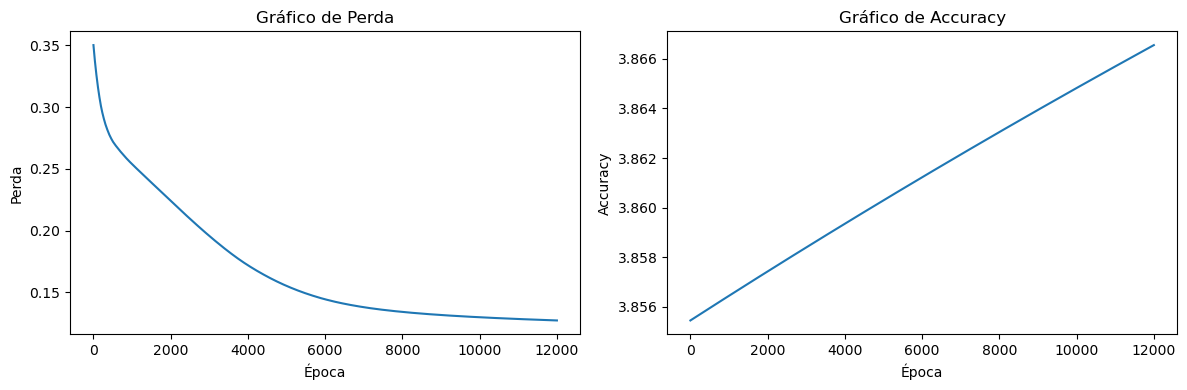

In [242]:
X = df.iloc[:,1:9].values
y = df.iloc[:,-5:-4].values

model = MLP(num_dados_entrada=X.shape[1], neuronios_c1=50, neuronios_c2=20, num_targets=y.shape[1])

num_epochs = 12000

loss_values, acc_values = [], []

# Define o otimizador
optimizer = optim.SGD(model.parameters(), lr=0.001)

criterion = nn.MSELoss()

min_loss = float('inf')
min_loss_value = None

for epoch in range(num_epochs):
    model.train()
    epoch_loss,num_batches = 0.0,0  # Variável para armazenar a perda da época atual
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        num_batches += 1
        
    epoch_loss /= num_batches 
    epoch_loss = np.sqrt(epoch_loss)
    
    accuracy = correct / total
    
    acc_values.append(accuracy)
    loss_values.append(epoch_loss)  # Armazena o valor da perda da época atual

    if epoch_loss < min_loss:
        min_loss = epoch_loss
        min_loss_value = outputs
        min_loss_params = model.state_dict()
        min_loss_features = inputs

print(f"Valor mínimo da perda: {round(min_loss,4)}")
# print(f"Valor correspondente: {min_loss_value}")

for feature_values in min_loss_features:
    print(f"Valores das features: {feature_values}")

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(range(1, num_epochs + 1), loss_values)
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Gráfico de Perda')

plt.subplot(1,2,2)
plt.plot(range(1, num_epochs + 1), acc_values)
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.title('Gráfico de Accuracy')

plt.tight_layout()
plt.show()